# Графики

<!--Этот файл помогает hypertrain11.ipynb правильно нарисовать графики. Без
его помощи hypertrain11.ipynb не справился бы.-->

In [100]:
import json

with open('./report.json') as report:
    report = json.load(report)

In [101]:
import pandas as pd
pd.DataFrame(report['evaluate_RegularNetwork_2_p0_N2'])

,noise_factor,accuracy,f1,roc_auc
0,0.00,0.916185,0.919610,0.989121
1,0.04,0.913295,0.916961,0.988632
2,0.08,0.901734,0.905165,0.986697
3,0.12,0.916185,0.919051,0.986363
4,0.16,0.893064,0.897363,0.983613
5,0.20,0.901734,0.905548,0.982616
6,0.24,0.913295,0.916372,0.982005
7,0.28,0.887283,0.889962,0.967709
8,0.32,0.846821,0.851066,0.969926
9,0.36,0.864162,0.865896,0.961206


In [102]:
pd.DataFrame(report['loss_AugmentedReLUNetwork_2_p0.05_N7'])

,0
0,1.515457
1,1.316339
2,1.342000
3,1.045563
4,0.997774
...,...
1155,0.187133
1156,0.145356
1157,0.284774
1158,0.116929


In [103]:
df = pd.DataFrame([[key] + key.split('_') for key in report.keys()])
df.columns = ['Key', 'Measurement', 'Network', 'Dataset', 'P', 'N']
df.Dataset = df.Dataset.apply(lambda x: int(x))
df.P = df.P.apply(lambda x: float(x[1:]))
df.N = df.N.apply(lambda x: int(x[1:]))
df

,Key,Measurement,Network,Dataset,P,N
0,loss_RegularNetwork_1_p0_N0,loss,RegularNetwork,1,0.00,0
1,loss_AugmentedReLUNetwork_1_p0_N0,loss,AugmentedReLUNetwork,1,0.00,0
2,loss_RegularNetwork_2_p0_N0,loss,RegularNetwork,2,0.00,0
3,loss_AugmentedReLUNetwork_2_p0_N0,loss,AugmentedReLUNetwork,2,0.00,0
4,loss_RegularNetwork_3_p0_N0,loss,RegularNetwork,3,0.00,0
...,...,...,...,...,...,...
835,evaluate_RegularNetwork_2_p0.99_N9,evaluate,RegularNetwork,2,0.99,9
836,evaluate_RegularNetwork_3_p0.99_N9,evaluate,RegularNetwork,3,0.99,9
837,evaluate_AugmentedReLUNetwork_1_p0.99_N9,evaluate,AugmentedReLUNetwork,1,0.99,9
838,evaluate_AugmentedReLUNetwork_2_p0.99_N9,evaluate,AugmentedReLUNetwork,2,0.99,9


In [104]:
from dataclasses import dataclass

@dataclass
class PlotParams:
    measurement: str
    dataset: int
    network = 'AugmentedReLUNetwork'
    metric: str
    p: int

In [105]:
def compute_dataframe(plot_params: PlotParams) -> pd.DataFrame:
    rows = (
        df
            .loc[df.Measurement == plot_params.measurement]
            .loc[df.Dataset == plot_params.dataset]
            .loc[df.Network == plot_params.network]
            .loc[df.P == plot_params.p]
    )

    if plot_params.measurement == 'loss':
        values = pd.DataFrame([report[row.Key] for row in rows.itertuples()])
    else:
        cols = []
        
        for row in rows.itertuples():
            report_data = report[row.Key]
            cols.append(report_data[plot_params.metric])
            
        values = pd.DataFrame(cols)

    result = values.quantile([0.25, 0.75]).transpose()
    result['mean'] = values.mean()
    return result

pd.concat([compute_dataframe(
    PlotParams(
        measurement='evaluate',
        dataset=1,
        metric='accuracy',
        p=0,
    )
), compute_dataframe(
    PlotParams(
        measurement='evaluate',
        dataset=3,
        metric='mse',
        p=0.05,
    )
), compute_dataframe(
    PlotParams(
        measurement='evaluate',
        dataset=2,
        metric='f1',
        p=0.05,
    )
)], axis=1)



,0.25,0.75,mean,0.25,0.75,mean,0.25,0.75,mean
0,0.912281,0.936404,0.910526,15.757455,17.135297,16.579018,0.927655,0.938892,0.929539
1,0.912281,0.936404,0.910526,15.771157,17.170691,16.600411,0.924359,0.938803,0.928440
2,0.912281,0.936404,0.910526,15.775719,17.222878,16.629390,0.919502,0.936258,0.927266
3,0.912281,0.936404,0.910526,15.876834,17.373856,16.710673,0.909265,0.924054,0.916045
4,0.912281,0.936404,0.910526,15.963411,17.372471,16.787836,0.911287,0.924448,0.913168
5,0.912281,0.936404,0.910526,16.082497,17.490043,16.920696,0.891964,0.913153,0.902897
6,0.912281,0.936404,0.910526,16.284897,17.664027,17.067869,0.884952,0.904800,0.892921
7,0.905702,0.936404,0.909649,16.282884,17.804276,17.123885,0.874888,0.898770,0.887543
8,0.912281,0.936404,0.910526,16.678998,18.424373,17.419963,0.863528,0.878896,0.873545
9,0.905702,0.929825,0.908772,16.979859,18.475041,17.584005,0.856113,0.865348,0.862887


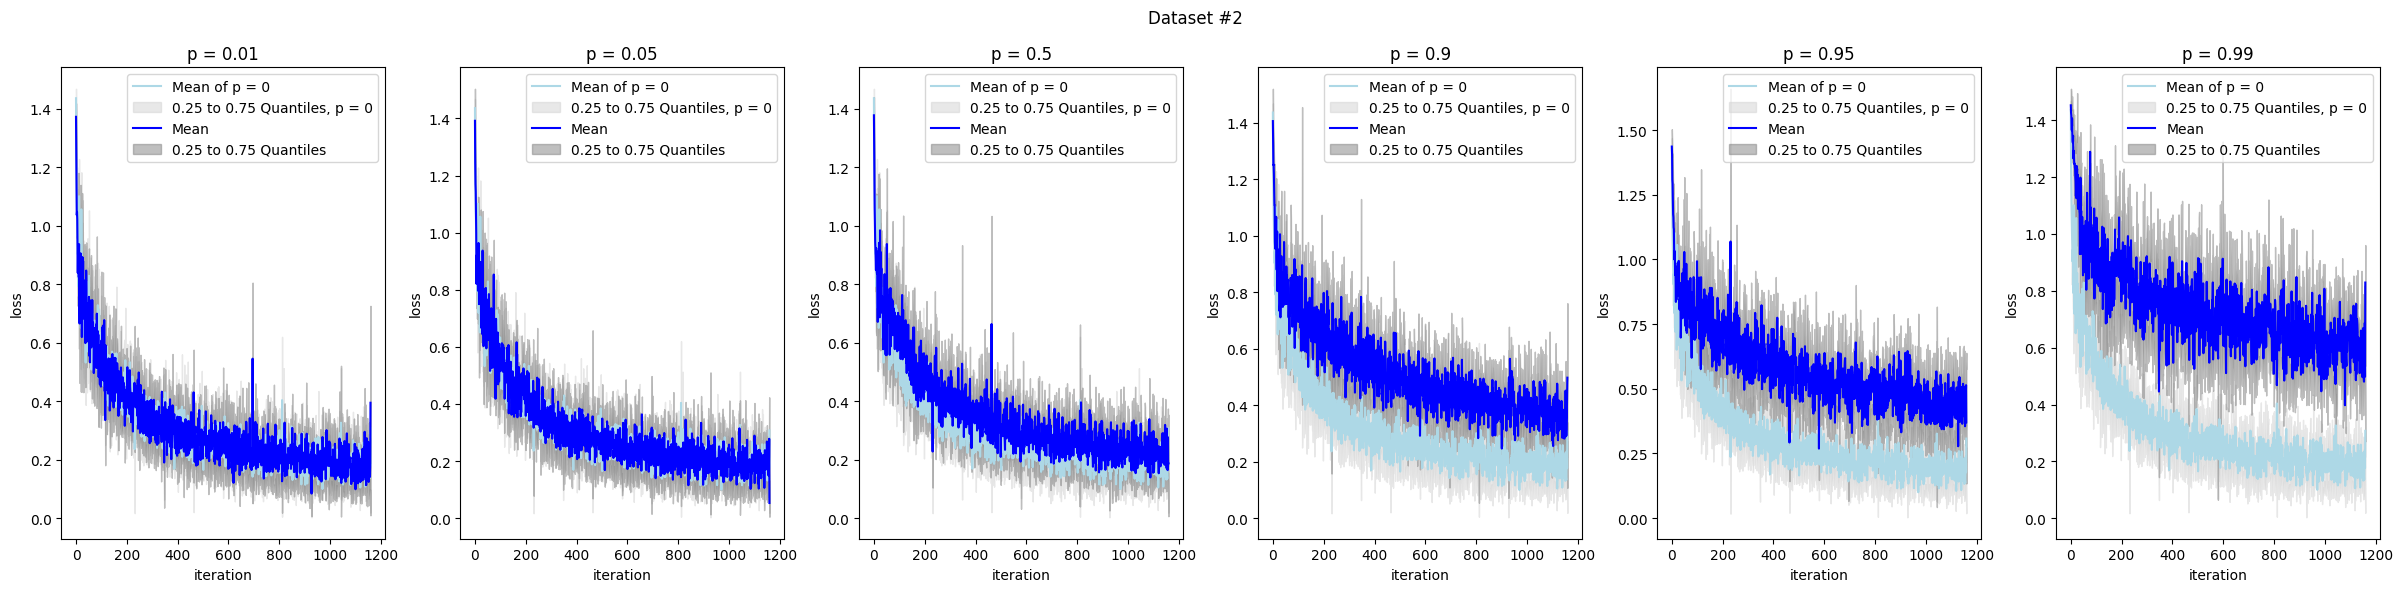

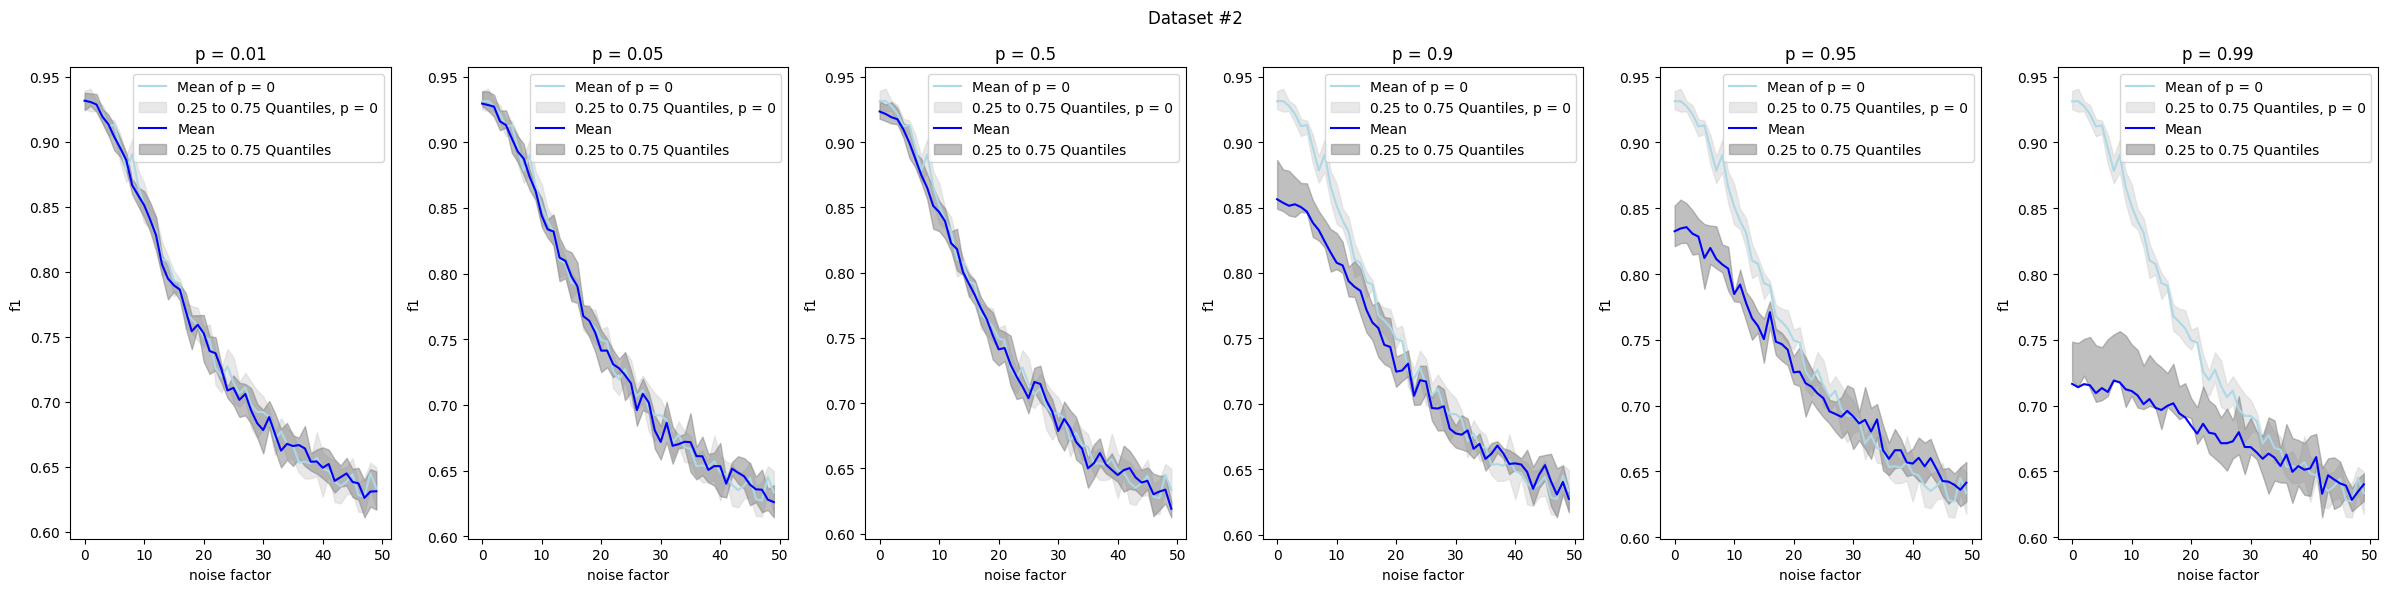

In [106]:
import matplotlib.pyplot as plt

def plot_curve(
    ax: object,
    means: pd.Series,
    lowerqs: pd.Series,
    upperqs: pd.Series,
    zmeans: pd.Series,
    zlowerqs: pd.Series,
    zupperqs: pd.Series,
    X: pd.Series,
    title: str,
    xlabel: str,
    ylabel: str,
):
    ax.plot(X, zmeans, label='Mean of p = 0', color='lightblue')
    ax.fill_between(X, zlowerqs, zupperqs, color='lightgray', alpha=0.5, label='0.25 to 0.75 Quantiles, p = 0')
    ax.plot(X, means, label='Mean', color='blue')
    ax.fill_between(X, lowerqs, upperqs, color='gray', alpha=0.5, label='0.25 to 0.75 Quantiles')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()


for (measurement, metric, dataset, xlabel) in [
    ('loss', 'loss', 2, 'iteration'),
    ('evaluate', 'f1', 2, 'noise factor')
]:
    fig, axs = plt.subplots(1, 6, figsize=(24, 6))
    reference_curve = compute_dataframe(plot_params=PlotParams(
        measurement=measurement,
        dataset=dataset,
        metric=metric,
        p=0,
    ))

    for (i, p) in enumerate([0.01, 0.05, 0.5, 0.9, 0.95, 0.99]):
        plot_params=PlotParams(
            measurement=measurement,
            dataset=dataset,
            metric=metric,
            p=p,
        )

        curve=compute_dataframe(plot_params=plot_params)

        plot_curve(
            ax=axs[i],
            means=curve['mean'],
            lowerqs=curve[0.25],
            upperqs=curve[0.75],
            zmeans=reference_curve['mean'],
            zlowerqs=reference_curve[0.25],
            zupperqs=reference_curve[0.75],
            X=curve.index,
            title=f'p = {plot_params.p}',
            xlabel=xlabel,
            ylabel=metric,
        )
    fig.suptitle(f'Dataset #{plot_params.dataset}')
    plt.tight_layout()
    plt.show()